Jonathan Kevin 20.K1.0009
Implementasi C4.5 Decision Tree

Agar kode dapat berjalan dengan baik ada berberapa library yang perlu diinstall
1. Pandas
2. Seaborn
3. Numpy
4. Matplotlib
5. scikit-learn

Semua bisa di install dengan pip install (nama library)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Karena disini menggunakan pandas untuk membaca dataset dalam excel maka pastikan dalam 

data = pd.read_csv(lokasi milknew.csv) agar data dapat dibaca

In [2]:
data = pd.read_csv('D:\AlatSemester5\ProjekDatamining\milknew.csv')

Ganti lokasi dalam line data = pd.read_csv('D:\AlatSemester5\ProjekDatamining\milknew.csv') ke lokasi csv yang baru agar dapat dijalankan

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.shape

(1059, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

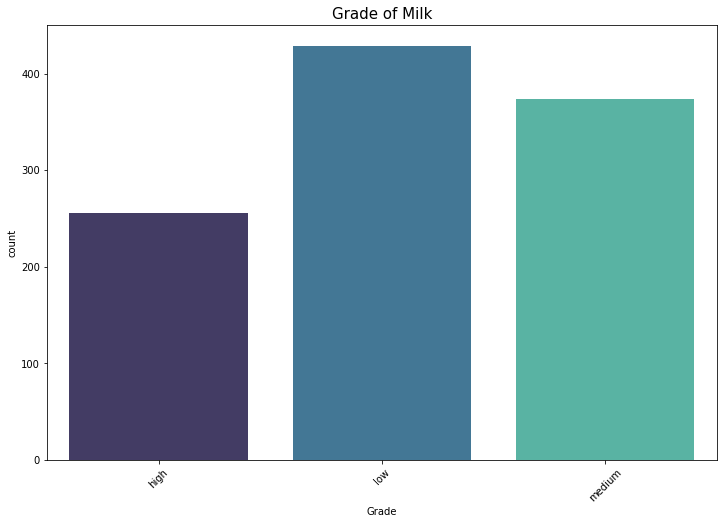

In [8]:
plt.figure(figsize=(12,8))
plt.title("Grade of Milk",fontsize=15)
c1=sns.countplot(x='Grade',data=data,palette="mako")
plt.xticks(rotation=45)
plt.show()

In [9]:
counts = data['Grade'].value_counts()
high_count = counts['high']
low_count = counts['low']
medium_count = counts['medium']
print("High:",high_count,"Low:",low_count,"Medium:",medium_count)


High: 256 Low: 429 Medium: 374


In [10]:
array = data.values

x = array[:, 0:7]
y = array[:, 7]

In [11]:
x,y

(array([[6.6, 35, 1, ..., 1, 0, 254],
        [6.6, 36, 0, ..., 0, 1, 253],
        [8.5, 70, 1, ..., 1, 1, 246],
        ...,
        [3.0, 40, 1, ..., 1, 1, 255],
        [6.8, 43, 1, ..., 1, 0, 250],
        [8.6, 55, 0, ..., 1, 1, 255]], dtype=object),
 array(['high', 'high', 'low', ..., 'low', 'high', 'low'], dtype=object))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
x_train.shape , x_test.shape

((847, 7), (212, 7))

In [14]:
y_train.shape , y_test.shape

((847,), (212,))

In [15]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[-0.75351671,  0.56939223, -1.05962589, ...,  0.70272837,
         1.00592071,  0.72247537],
       [ 0.11364179, -0.32426167, -1.05962589, ..., -1.42302495,
        -0.99411413,  0.72247537],
       [-1.548412  ,  1.56234101, -1.05962589, ...,  0.70272837,
         1.00592071, -0.42908022],
       ...,
       [-2.63236012, -0.42355655,  0.9437293 , ...,  0.70272837,
         1.00592071,  0.72247537],
       [-2.63236012, -0.42355655,  0.9437293 , ...,  0.70272837,
         1.00592071,  0.72247537],
       [-0.10314784, -0.72144118, -1.05962589, ..., -1.42302495,
        -0.99411413, -1.5806358 ]])

In [16]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=1)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

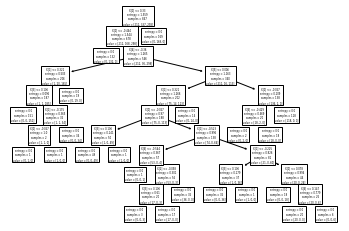

In [17]:
tree.plot_tree(clf_en)
y_pred = clf_en.predict(x_test)

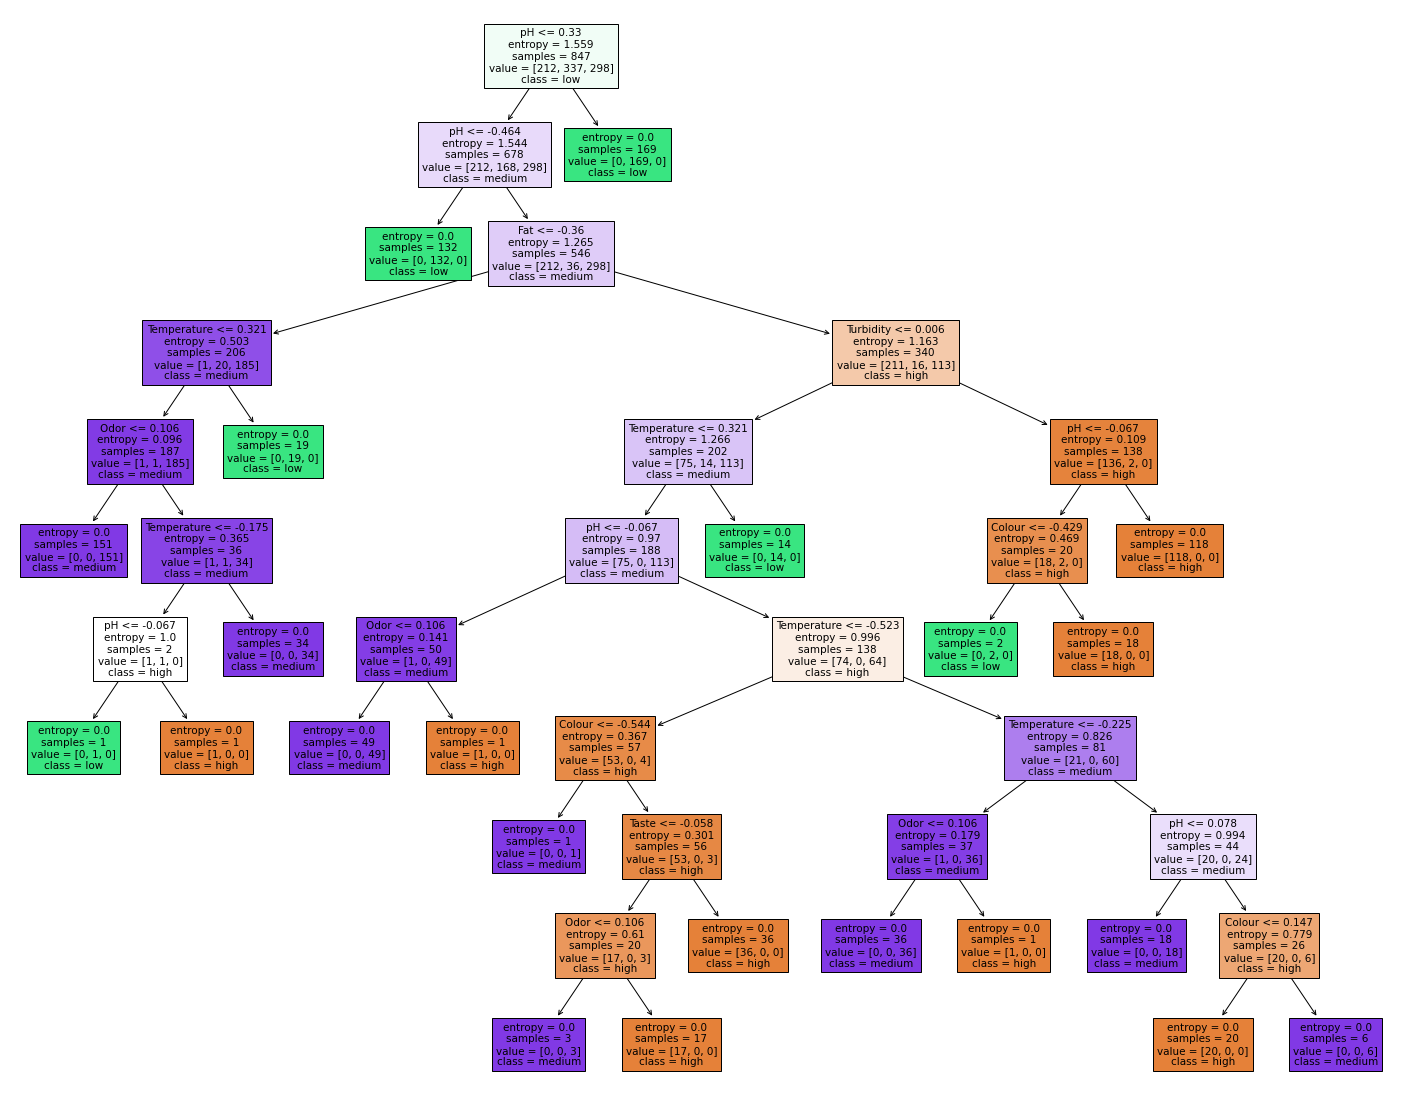

In [18]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=feature_names,  
                   class_names=label_names,
                   filled=True)

In [19]:
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi = ",akurasi*100)

Akurasi =  96.22641509433963


In [20]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

        high       0.85      1.00      0.92        44
         low       1.00      1.00      1.00        92
      medium       1.00      0.89      0.94        76

    accuracy                           0.96       212
   macro avg       0.95      0.96      0.95       212
weighted avg       0.97      0.96      0.96       212



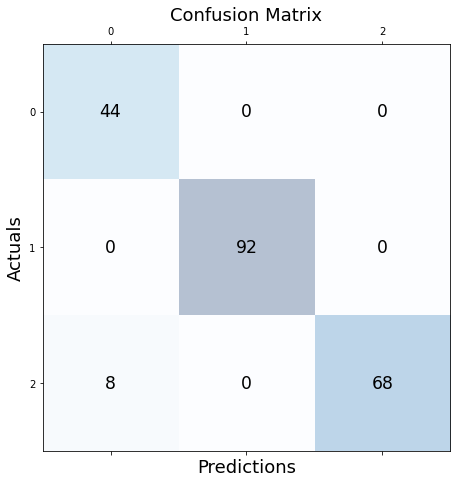

In [21]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

sekarang kita coba ubah jumlah data dalam model menjadi 70 training 30 test

In [22]:
array = data.values

x = array[:, 0:7]
y = array[:, 7]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [23]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[-2.64873241, -0.39886404,  0.93846186, ...,  0.71787006,
         1.01770049,  0.72961711],
       [-0.04230702,  0.09787252, -1.06557341, ...,  0.71787006,
         1.01770049, -0.40428868],
       [ 1.33330638,  2.58155532, -1.06557341, ..., -1.39300976,
        -0.98260737, -1.31141331],
       ...,
       [-2.64873241, -0.39886404,  0.93846186, ...,  0.71787006,
         1.01770049,  0.72961711],
       [-2.64873241, -0.39886404,  0.93846186, ...,  0.71787006,
         1.01770049,  0.72961711],
       [-0.11470773, -0.69690598, -1.06557341, ..., -1.39300976,
        -0.98260737, -1.53819447]])

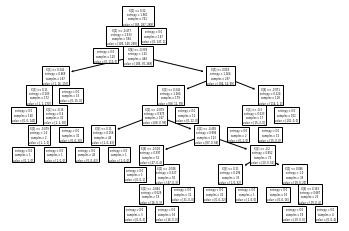

In [24]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=1)

clf_en.fit(x_train, y_train)
tree.plot_tree(clf_en)
y_pred = clf_en.predict(x_test)

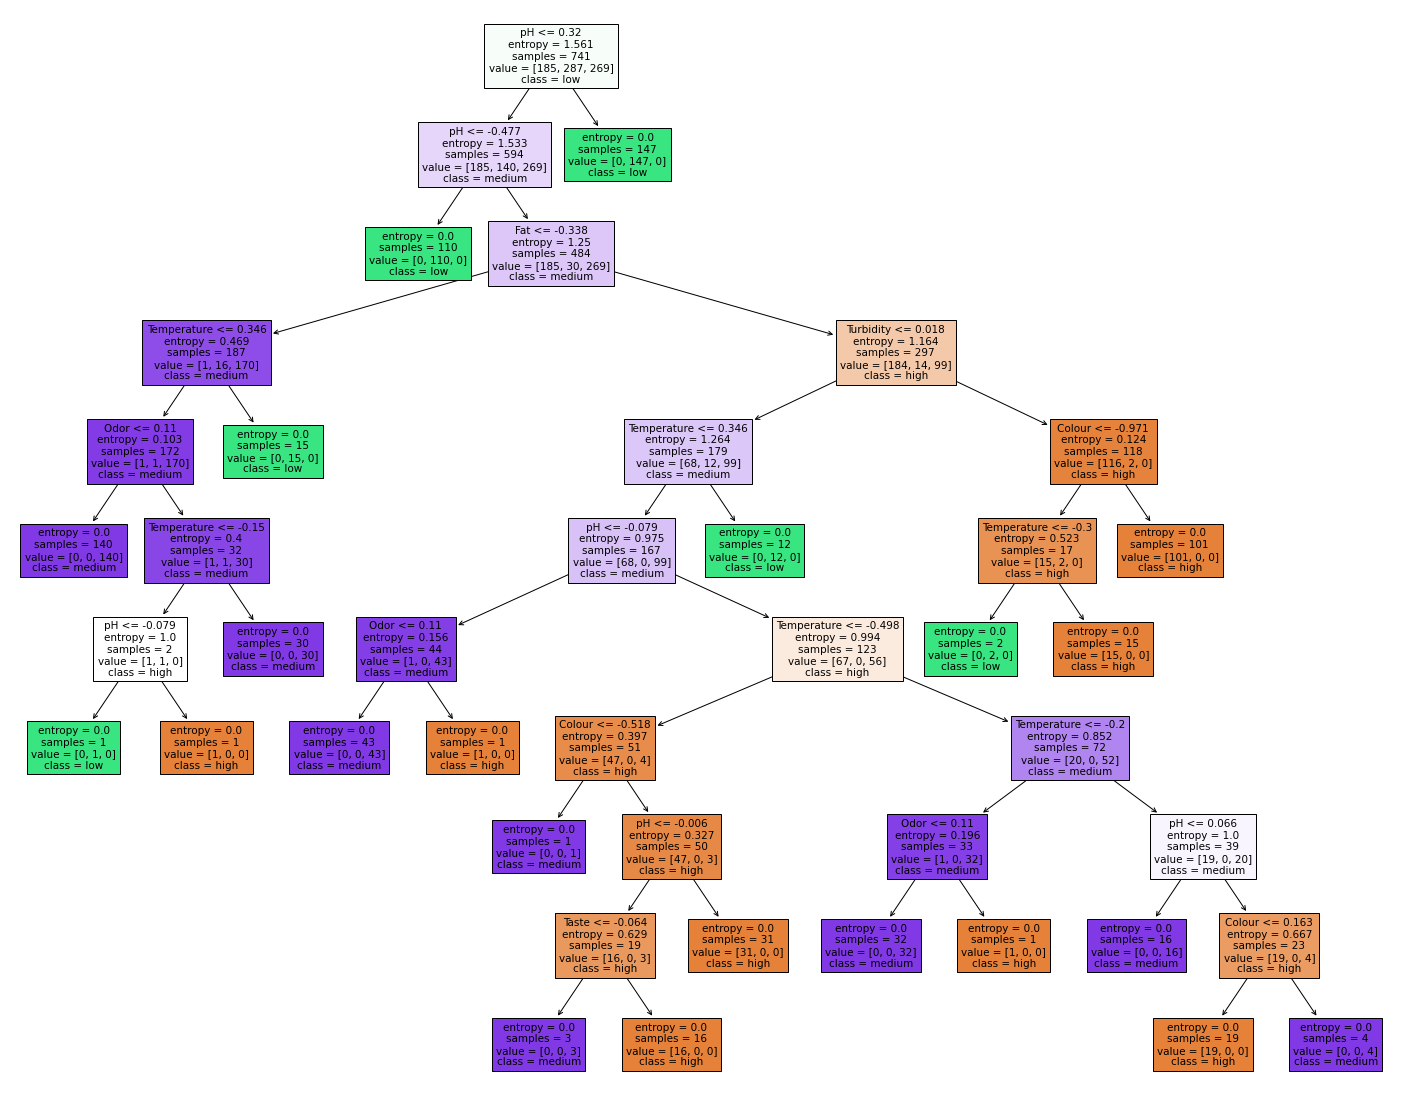

In [25]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=feature_names,  
                   class_names=label_names,
                   filled=True)

In [26]:
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi = ",akurasi*100)

Akurasi =  95.9119496855346


In [27]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

        high       0.85      1.00      0.92        71
         low       1.00      1.00      1.00       142
      medium       1.00      0.88      0.93       105

    accuracy                           0.96       318
   macro avg       0.95      0.96      0.95       318
weighted avg       0.97      0.96      0.96       318



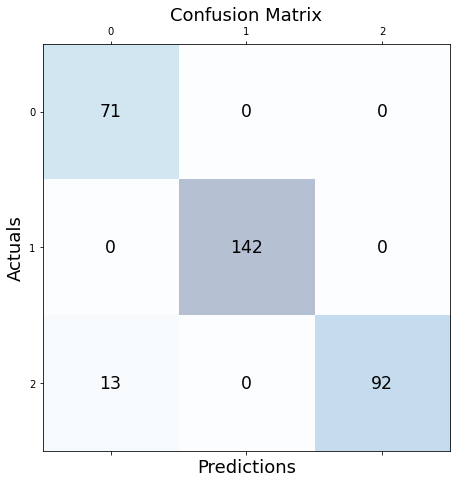

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

sekarang kita coba ubah jumlah data dalam model untuk 50/50

In [29]:
array = data.values

x = array[:, 0:7]
y = array[:, 7]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [30]:
x_train.shape, x_test.shape

((529, 7), (530, 7))

In [31]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[-0.05564454, -0.71222311,  0.97203546, ...,  0.72725631,
        -0.99811142,  0.73371807],
       [-0.12796877, -0.61164489,  0.97203546, ...,  0.72725631,
         1.00189215,  0.73371807],
       [-0.12796877, -0.61164489,  0.97203546, ...,  0.72725631,
         1.00189215,  0.73371807],
       ...,
       [-2.65931689, -0.41048844,  0.97203546, ...,  0.72725631,
         1.00189215,  0.73371807],
       [-2.65931689, -0.41048844,  0.97203546, ...,  0.72725631,
         1.00189215,  0.73371807],
       [-0.12796877, -0.71222311, -1.02876905, ..., -1.37503105,
        -0.99811142, -1.52683441]])

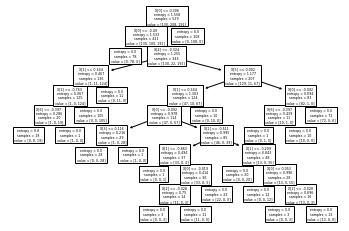

In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=1)

clf_en.fit(x_train, y_train)
tree.plot_tree(clf_en)
y_pred = clf_en.predict(x_test)

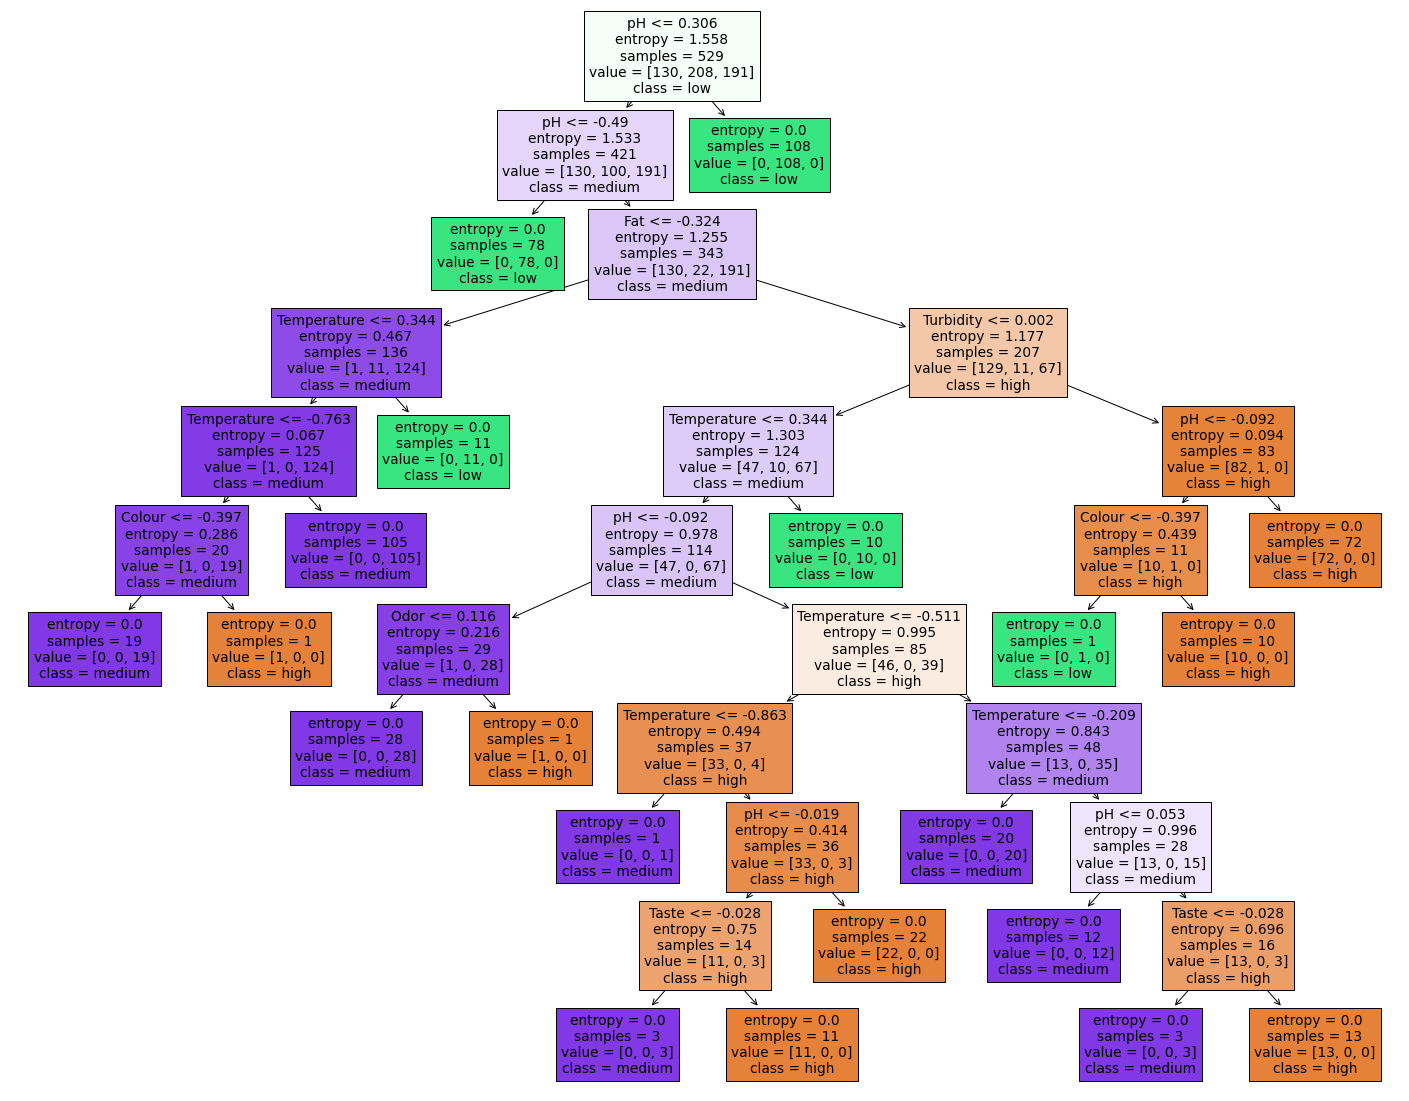

In [33]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=feature_names,  
                   class_names=label_names,
                   filled=True)

In [34]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

        high       0.84      0.98      0.91       126
         low       1.00      0.99      1.00       221
      medium       0.98      0.88      0.93       183

    accuracy                           0.95       530
   macro avg       0.94      0.95      0.94       530
weighted avg       0.96      0.95      0.95       530



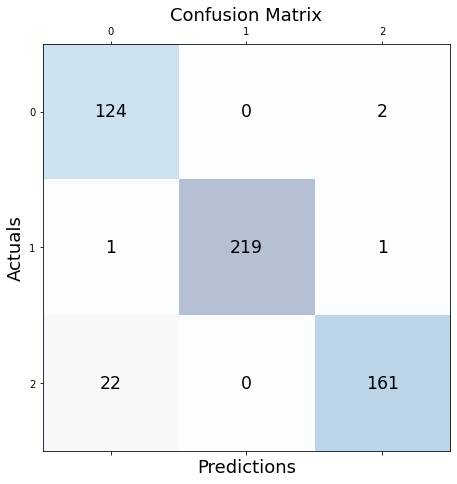

In [35]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [36]:
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi = ",akurasi*100)

Akurasi =  95.09433962264151


Sekarang untuk data yang dibagi 60/40

In [37]:
array = data.values

x = array[:, 0:7]
y = array[:, 7]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [38]:
x_train.shape, x_test.shape

((635, 7), (424, 7))

In [39]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

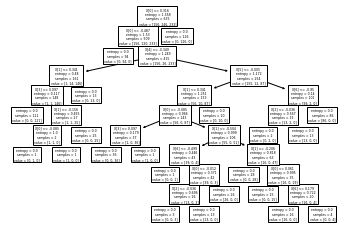

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=1)

clf_en.fit(x_train, y_train)
tree.plot_tree(clf_en)
y_pred = clf_en.predict(x_test)

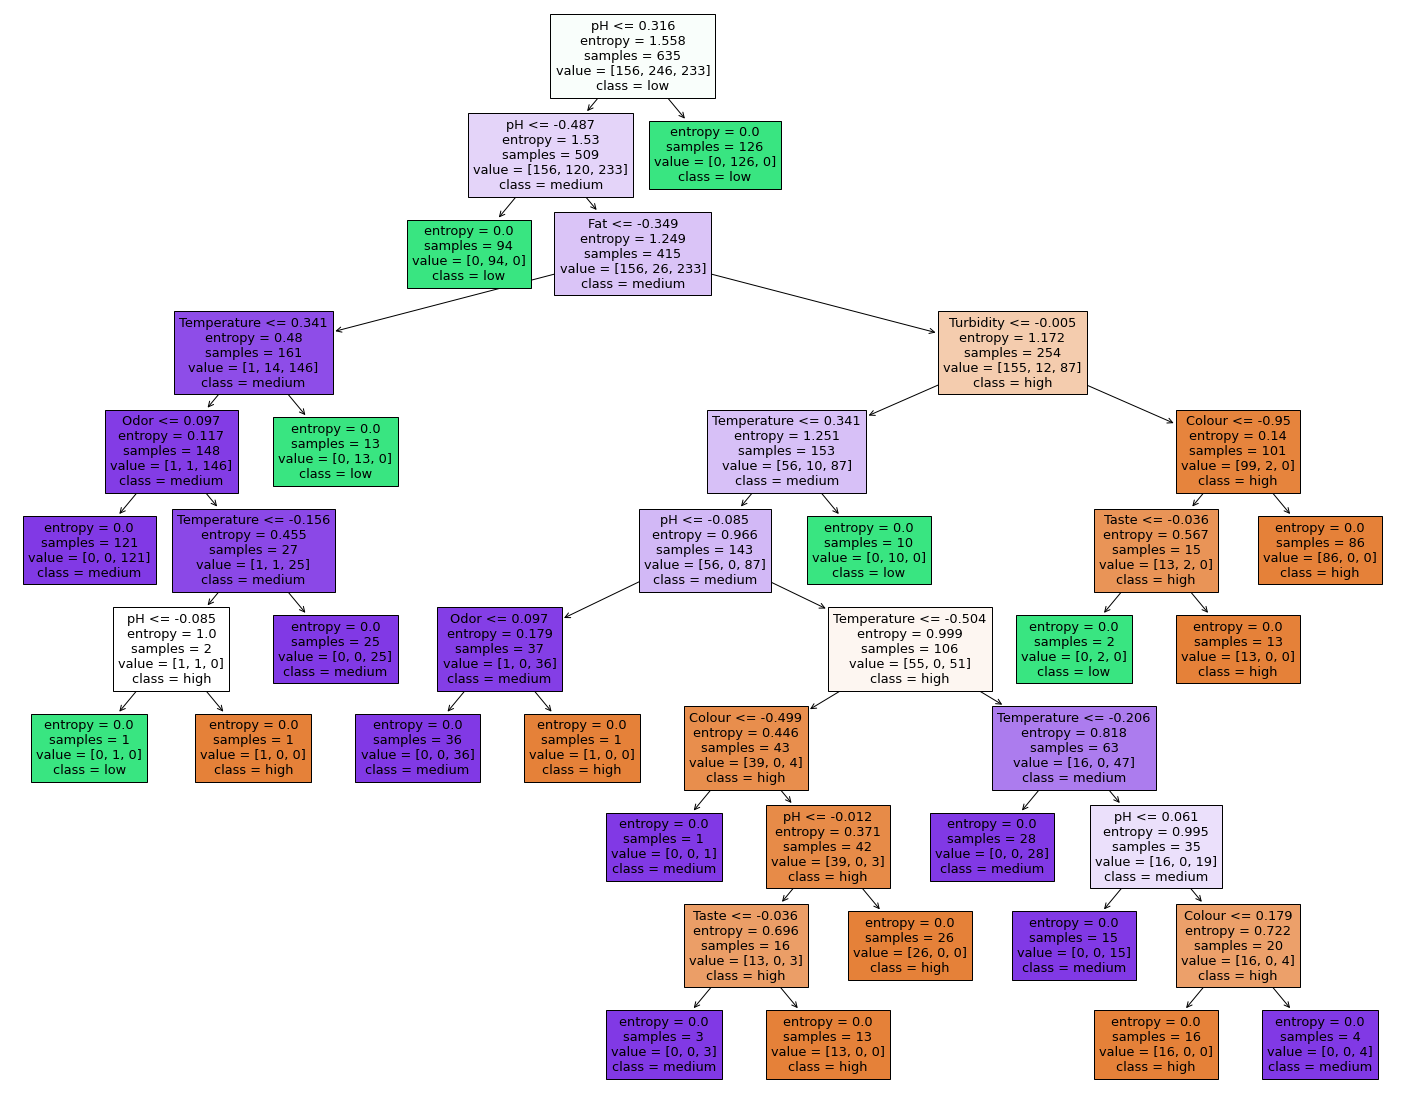

In [41]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=feature_names,  
                   class_names=label_names,
                   filled=True)

In [42]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

        high       0.86      0.99      0.92       100
         low       1.00      1.00      1.00       183
      medium       0.99      0.89      0.94       141

    accuracy                           0.96       424
   macro avg       0.95      0.96      0.95       424
weighted avg       0.96      0.96      0.96       424



In [43]:
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi = ",akurasi*100)

Akurasi =  95.99056603773585


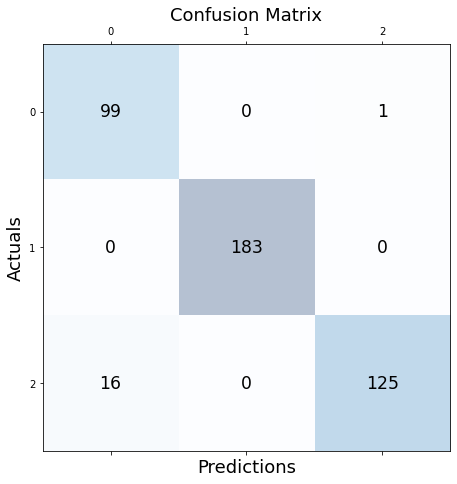

In [44]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()